In [76]:
import numpy as np
import pandas as pd
import math
import random
from matplotlib import pyplot
from tqdm import tqdm_notebook

In [68]:
class Neural:
    def __init__(self, n_input, n_hidden, n_output):
        self.hidden_weight = numpy.random.random_sample((n_hidden, n_input + 1))
        self.output_weight = numpy.random.random_sample((n_output, n_hidden + 1))
        self.hidden_momentum = numpy.zeros((n_hidden, n_input + 1))
        self.output_momentum = numpy.zeros((n_output, n_hidden + 1))

    def train(self, X, Y, epsilon, mu, epoch):
        self.error = numpy.zeros(epoch)
        n = X.shape[0]
        m = X.shape[1]
        Y = self.__prepare_Y(Y)
        for epo in tqdm_notebook(range(epoch)):
            for i in range(N):
                x = X[i, :]
                y = Y[i, :]
                self.__update_weight(x, y, epsilon, mu)

            self.error[epo] = self.__calc_error(X, Y)

    def predict(self, X):
        N = X.shape[0]
        C = numpy.zeros(N).astype('int')
        Y = numpy.zeros((N, X.shape[1]))
        for i in range(N):
            x = X[i, :]
            z, y = self.__forward(x)
            Y[i] = y
            C[i] = y.argmax()

        return (C, Y)

    def error_graph(self):
        pyplot.ylim(0.0, 2.0)
        pyplot.plot(numpy.arange(0, self.error.shape[0]), self.error)
        pyplot.show()

    def __sigmoid(self, arr):
        return numpy.vectorize(lambda x: 1.0 / (1.0 + math.exp(-x)))(arr)


    def __forward(self, x):
        # z: output in hidden layer, y: output in output layer
        z = self.__sigmoid(self.hidden_weight.dot(numpy.r_[numpy.array([1]), x]))
        y = self.__sigmoid(self.output_weight.dot(numpy.r_[numpy.array([1]), z]))

        return (z, y)

    def __update_weight(self, x, t, epsilon, mu):
        z, y = self.__forward(x)

        # update output_weight
        output_delta = (y - t) * y * (1.0 - y)
        _output_weight = self.output_weight
        self.output_weight -= epsilon * output_delta.reshape((-1, 1)) * numpy.r_[numpy.array([1]), z] - mu * self.output_momentum
        self.output_momentum = self.output_weight - _output_weight

        # update hidden_weight
        hidden_delta = (self.output_weight[:, 1:].T.dot(output_delta)) * z * (1.0 - z)
        _hidden_weight = self.hidden_weight
        self.hidden_weight -= epsilon * hidden_delta.reshape((-1, 1)) * numpy.r_[numpy.array([1]), x]
        self.hidden_momentum = self.hidden_weight - _hidden_weight

    def __prepare_Y(self, Y):
        new_Y = []
        for y in Y:
            tmp_y = np.zeros(m)
            tmp_y[t] = 1
            new_Y.append(tmp_y)
            
        return np.array(new_Y)

    def __calc_error(self, X, Y):
        N = X.shape[0]
        err = 0.0
        for i in range(N):
            x = X[i, :]
            y = Y[i, :]

            z, y_pred = self.__forward(x)
            err += (y_pred - y).dot((y_pred - y).reshape((-1, 1))) / 2.0

        return err

In [73]:
X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = numpy.array([1, 0, 0, 1])
N = X.shape[0] # number of data

input_size = X.shape[1]
hidden_size = 2
output_size = 2
epsilon = 0.1
mu = 0.9
epoch = 10000

nn = Neural(input_size, hidden_size, output_size)
nn.train(X, Y, epsilon, mu, epoch)

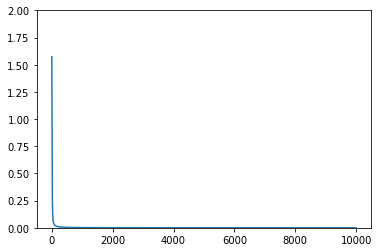

In [74]:
nn.error_graph()

In [75]:
df_X = pd.DataFrame(X, columns=['X1', 'X2'])
df_y = pd.DataFrame(Y, columns=['Y'])

C, Y_prob = nn.predict(X)
df_y_prob = pd.DataFrame(Y_prob, columns=['0の確率', '1の確率'])
df_c = pd.DataFrame(C, columns=['答え'])

df = pd.concat([df_X, df_y, df_y_prob, df_c], axis=1)
df

,X1,X2,Y,0の確率,1の確率,答え
0,0,0,1,0.008588,0.991063,1
1,0,1,0,0.006737,0.993367,1
2,1,0,0,0.005368,0.994971,1
3,1,1,1,0.004683,0.995750,1


In [77]:
import random

In [129]:
seed = 375
np.random.seed(seed)
np.random.rand(), np.random.rand(), np.random.rand()

(0.20317542432026658, 0.0821895564355003, 0.053701191665621595)

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
